In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import eigh
import pandas as pd

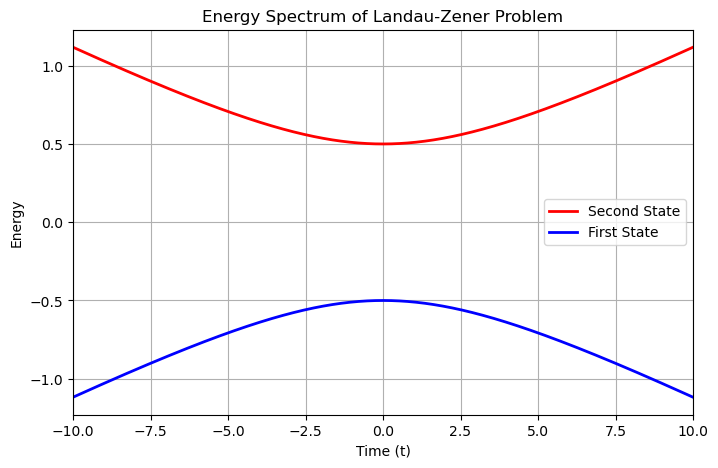

In [3]:
# Energy States
alpha = 0.1
rabi_frequency = 1
tau = 10
t_vals = np.linspace(-tau,tau, 1000)
t_limits = [-tau, tau]

sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

def Hamiltonian(t):
    return np.array(alpha*t*sigma_z + rabi_frequency/2*sigma_x, dtype=complex)

energies = np.array([np.linalg.eigvalsh(Hamiltonian(t)) for t in t_vals])
E_neg = energies[:,0]
E_pos = energies[:,1]

plt.figure(figsize=(8, 5))
plt.plot(t_vals, E_pos, label = 'Second State', linewidth = '2', color='red')
plt.plot(t_vals, E_neg, label = 'First State', linewidth = '2',color='blue')
plt.xlabel('Time (t)')
plt.ylabel('Energy')
plt.title('Energy Spectrum of Landau-Zener Problem')
plt.xlim((-10,10))
plt.legend()
plt.grid()
plt.savefig("EnergySpectrumLZ.svg") 
plt.show()

In [5]:
# Ground state
eigenvalues, eigenvectors = np.linalg.eigh(Hamiltonian(-tau))
ground_state = eigenvectors[:,0] / np.linalg.norm(eigenvectors[:,0])

def Schrodinger_Equation(t, psi):
    H = Hamiltonian(t)
    return -1j * H @ psi

sol  = solve_ivp(Schrodinger_Equation, t_limits, ground_state, t_eval=t_vals, method='RK45', vectorized=True)

state_vector = sol.y

final_state = state_vector[:, -1]  
prob_excited = np.abs(final_state[1])**2
print(f"Probability of being in the excited state: {prob_excited:.4f}")

# Analytical prediction
analytical_prob_excited = 1 - np.exp(-np.pi*rabi_frequency**2/(2*alpha))
print(f"Analitical probability of being in the excited state: {analytical_prob_excited:.4f}")

Probability of being in the excited state: 0.9554
Analitical probability of being in the excited state: 1.0000


In [7]:
# Comparison for different values

alphas = [0.1, 1, 10]
rabi_frequencies = [10, 0.1, 1]
taus = [10, 1, 0.1]

data = []

for alpha in alphas:
    for rabi_frequency in rabi_frequencies:
        for tau in taus:
        
            eigenvalues, eigenvectors = np.linalg.eigh(Hamiltonian(-tau))
            ground_state = eigenvectors[:,0]
            
            sol = solve_ivp(Schrodinger_Equation, t_limits, ground_state, t_eval=t_vals, method='RK45', vectorized=True, rtol=1e-7, atol=1e-9)
            
            state_vector = sol.y
            
            final_state = state_vector[:, -1]  
            prob_excited = np.abs(final_state[1])**2
            
            analytical_prob_excited = 1 - np.exp(-np.pi*rabi_frequency**2/(2*alpha))
            data.append([alpha, rabi_frequency, tau, prob_excited, analytical_prob_excited])

df = pd.DataFrame(data, columns=["Alpha", "Rabi Frequency", "Tau", "Numerical P(Excited)", "Analytical P(Excited)"])

pd.set_option("display.float_format", "{:.4f}".format)

df

,Alpha,Rabi Frequency,Tau,Numerical P(Excited),Analytical P(Excited)
0,0.1000,10.0000,10.0000,0.5978,1.0000
1,0.1000,10.0000,1.0000,0.6798,1.0000
2,0.1000,10.0000,0.1000,0.6879,1.0000
3,0.1000,0.1000,10.0000,0.0795,0.1454
4,0.1000,0.1000,1.0000,0.0876,0.1454
5,0.1000,0.1000,0.1000,0.3311,0.1454
6,0.1000,1.0000,10.0000,0.9562,1.0000
7,0.1000,1.0000,1.0000,0.7410,1.0000
8,0.1000,1.0000,0.1000,0.6683,1.0000
9,1.0000,10.0000,10.0000,0.9470,1.0000


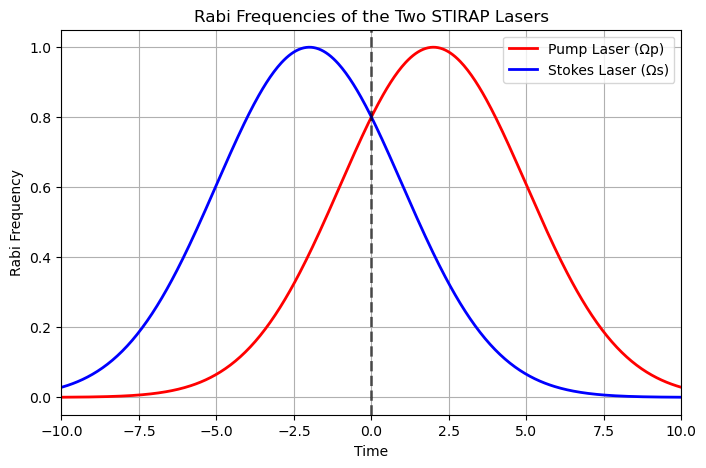

In [11]:
# Laser process

def gaussian_pulse(t, t0, width, max_amp):
    return max_amp * np.exp(-((t - t0) ** 2) / (2 * width ** 2))

tau = 10

t_values = np.linspace(-tau, tau, 500)

t0_p, width_p, max_amp_p = 2, 3, 1  
t0_s, width_s, max_amp_s = -2, 3, 1   

Omega_p = gaussian_pulse(t_values, t0_p, width_p, max_amp_p)
Omega_s = gaussian_pulse(t_values, t0_s, width_s, max_amp_s)

plt.figure(figsize=(8, 5))
plt.plot(t_values, Omega_p, label='Pump Laser (Ωp)', linestyle='-', color='red', linewidth = '2')
plt.plot(t_values, Omega_s, label='Stokes Laser (Ωs)', linestyle='-', color='blue', linewidth = '2')
plt.axvline(0, color='black', linestyle='--', alpha=0.6, linewidth = '2')
plt.xlabel('Time')
plt.ylabel('Rabi Frequency')
plt.title('Rabi Frequencies of the Two STIRAP Lasers')
plt.xlim((-10,10))
plt.grid()
plt.draw()
plt.legend()
plt.savefig("Pulses_Shape.svg", bbox_inches='tight')
plt.show()

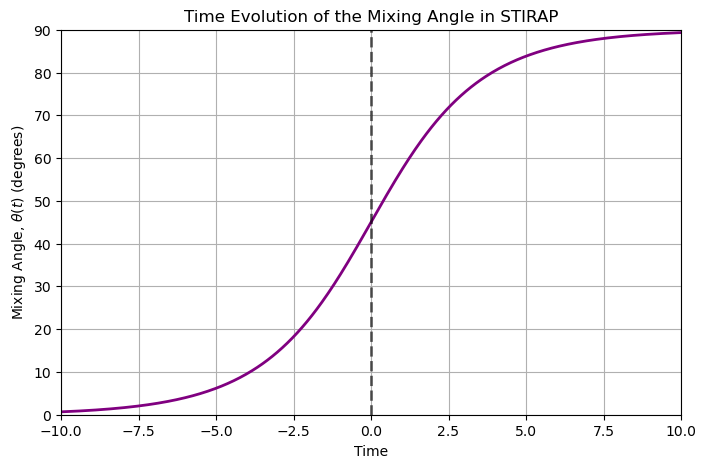

In [13]:
Q_values_degrees = np.degrees(np.arctan2(Omega_p, Omega_s))  # Convert radians to degrees

# Plot Q(t) in degrees
plt.figure(figsize=(8, 5))
plt.plot(t_values, Q_values_degrees, linestyle='-', color='purple', linewidth=2)
plt.axvline(0, color='black', linestyle='--', alpha=0.6, linewidth=2)
plt.xlabel('Time')
plt.ylabel(r'Mixing Angle, $\theta(t)$ (degrees)')
plt.title('Time Evolution of the Mixing Angle in STIRAP')
plt.ylim(0, 90)  # Limit the y-axis from 0 to 90 degrees
plt.xlim((-10, 10))
plt.grid()
plt.savefig("Mixing_Angle_Degrees.svg", bbox_inches='tight')
plt.show()

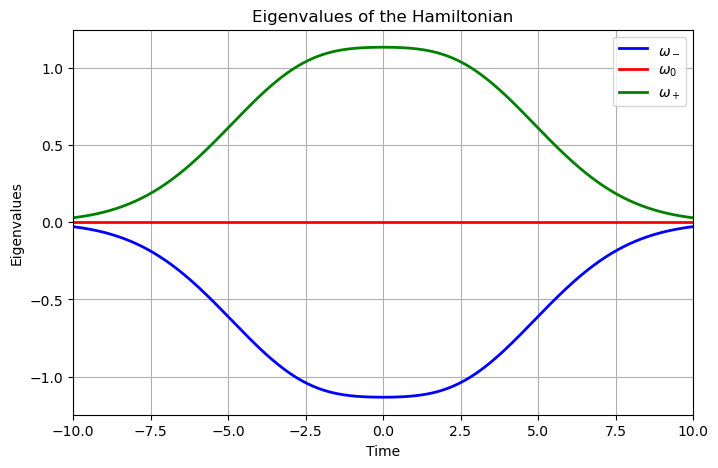

In [15]:
def hamiltonian(t, delta_p=0, delta_s=0):
    OmegaP = gaussian_pulse(t, t0_p, width_p, max_amp_p)
    OmegaS = gaussian_pulse(t, t0_s, width_s, max_amp_s)
    return np.array([
        [0, OmegaP, 0],
        [OmegaP, -delta_p, OmegaS],
        [0, OmegaS, -(delta_p - delta_s)]
    ])

def compute_eigenstates(time_array, delta_p=0, delta_s=0):
    eigenvalues = []
    dark_states = []
    
    for t in time_array:
        H = hamiltonian(t, delta_p, delta_s)
        eigvals, eigvecs = eigh(H)
        
        eigenvalues.append(eigvals)
        dark_index = np.argmin(abs(eigvecs[1]))  # Dark state: minimal |e> component
        dark_states.append(eigvecs[:, dark_index])
    
    return np.array(eigenvalues), np.array(dark_states)

eigenvalues, dark_states = compute_eigenstates(t_values)

plt.figure(figsize=(8,5))
colors = ['blue', 'red', 'green']
labels = [r'$\omega_-$', r'$\omega_0$', r'$\omega_+$']

for i in range(3):
    plt.plot(t_values, eigenvalues[:, i], label=labels[i], linewidth=2, color=colors[i])

plt.xlabel('Time')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues of the Hamiltonian')
plt.legend()
plt.xlim((-10,10))
plt.grid()
plt.savefig("Eigenvalues_Hamiltonian.svg", bbox_inches='tight')
plt.show()

   

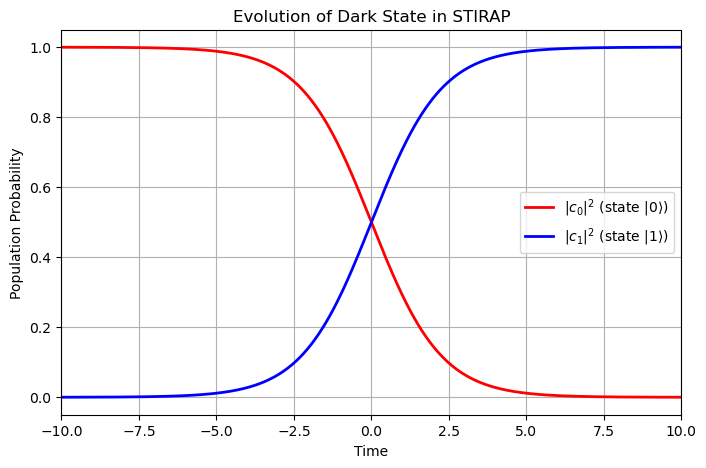

In [17]:
dark_states = np.array([
    [Omega_s[i], 0, -Omega_p[i]] / np.sqrt(Omega_s[i] ** 2 + Omega_p[i] ** 2)
    for i in range(len(t_values))
])

# Plot transition of dark state components
plt.figure(figsize=(8, 5))
plt.plot(t_values, dark_states[:, 0]**2, label=r'$|c_0|^2$ (state $|0\rangle$)', linewidth = '2', color='red')
plt.plot(t_values, dark_states[:, 2]**2, label=r'$|c_1|^2$ (state $|1\rangle$)', linewidth = '2', color='blue')
plt.xlabel('Time')
plt.ylabel('Population Probability')
plt.title('Evolution of Dark State in STIRAP')
plt.legend()
plt.xlim((-10,10))
plt.grid()
plt.savefig("Evolution_DarkState.svg", bbox_inches='tight')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14208\4176490447.py:11: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_value = simps(Omega_rms_valid, t_valid)


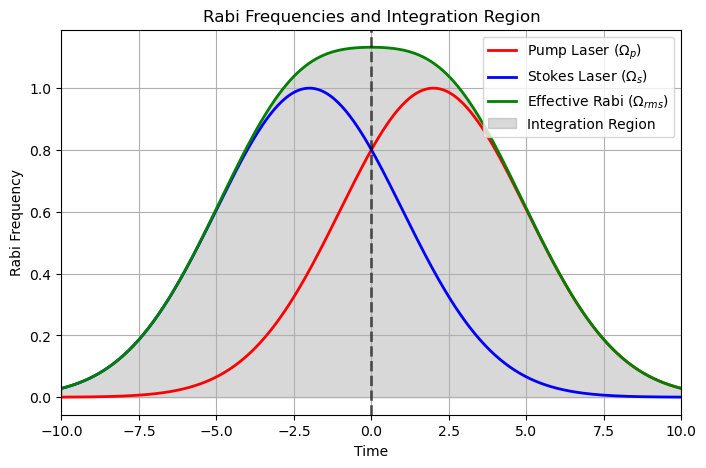

242.03150857811943 True


In [19]:
from scipy.integrate import simps

Omega_rms = np.sqrt(Omega_p**2 + Omega_s**2)

valid_indices = np.where((Omega_p > 0) & (Omega_s > 0))[0]
t_valid = t_values[valid_indices]
interval_limits = [t_valid[0], t_valid[-1]]
interval_integration = np.abs(t_valid[0]) + np.abs(t_valid[-1])
Omega_rms_valid = Omega_rms[valid_indices]

integral_value = simps(Omega_rms_valid, t_valid)

plt.figure(figsize=(8, 5))
plt.plot(t_values, Omega_p, label=r'Pump Laser $(Ω_p)$', linestyle='-', color='red', linewidth=2)
plt.plot(t_values, Omega_s, label=r'Stokes Laser $(Ω_s)$', linestyle='-', color='blue', linewidth=2)
plt.plot(t_values, Omega_rms, label=r'Effective Rabi $(Ω_{rms})$', linestyle='-', color='green', linewidth=2)
plt.fill_between(t_valid, 0, Omega_rms_valid, color='gray', alpha=0.3, label="Integration Region")
plt.axvline(0, color='black', linestyle='--', alpha=0.6, linewidth=2)
plt.xlabel('Time')
plt.ylabel('Rabi Frequency')
plt.xlim((-10,10))
plt.title('Rabi Frequencies and Integration Region')
plt.legend(loc='upper right')
plt.grid()
plt.savefig("IntegrationRegion.svg", bbox_inches='tight')
plt.show()

adiabatic_evaluation = integral_value * interval_integration
print(adiabatic_evaluation, adiabatic_evaluation > 10)

Integration successful.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14208\4213364451.py:57: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  adiabatic_evaluation = simps(Omega_rms, t_values)


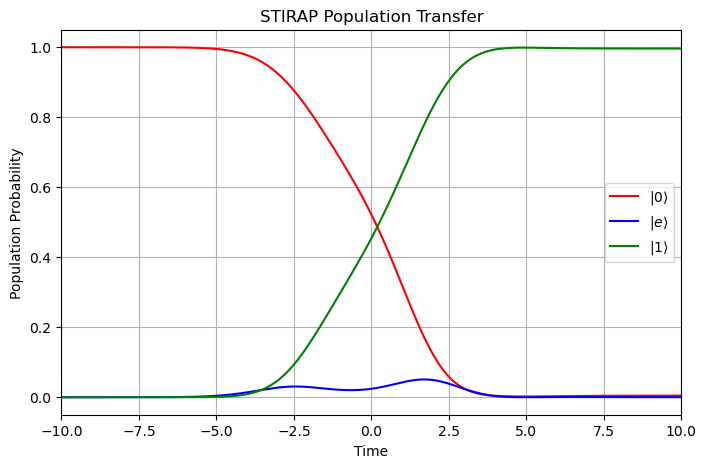

Final transfer probability: 0.996178
Landau-Zener prediction: 1.000000
Adiabatic integral evaluation: 12.101575


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, simps


Omega0 = 1.0  
alpha = 0.10  
T = 10        
t_values = np.linspace(-T, T, 1000)  


def gaussian_pulse(t, t0, width, max_amp):
    return max_amp * np.exp(-((t - t0) ** 2) / (2 * width ** 2))


t0_p, width_p, max_amp_p = 2, 3, 1  
t0_s, width_s, max_amp_s = -2, 3, 1  


OmegaP_values = gaussian_pulse(t_values, t0_p, width_p, max_amp_p)
OmegaS_values = gaussian_pulse(t_values, t0_s, width_s, max_amp_s)


def hamiltonian(t, delta_p=0, delta_s=0):
    OmegaP = gaussian_pulse(t, t0_p, width_p, max_amp_p)
    OmegaS = gaussian_pulse(t, t0_s, width_s, max_amp_s)
    return np.array([
        [0, OmegaP, 0],
        [OmegaP, -delta_p, OmegaS],
        [0, OmegaS, +delta_s -delta_p]  
    ])
    

def schrodinger(t, psi, delta_p=0, delta_s=0):
    H = hamiltonian(t, delta_p, delta_s)
    return -1j * H @ psi 


psi0 = np.array([1, 0, 0], dtype=complex)
time_span = (t_values[0], t_values[-1])


sol = solve_ivp(schrodinger, time_span, psi0, t_eval=t_values, method='BDF', args=(0, 0))


if sol.success:
    print("Integration successful.")
else:
    print("Integration failed.")


final_state = sol.y[:, -1]
prob_transfer = np.abs(final_state[2])**2  


Omega_rms = np.sqrt(OmegaP_values**2 + OmegaS_values**2)
adiabatic_evaluation = simps(Omega_rms, t_values)  


P_LZ = 1 - np.exp(-np.pi * Omega0**2 / (2 * alpha))


plt.figure(figsize=(8, 5))
plt.plot(t_values, np.abs(sol.y[0])**2, label=r'$|0\rangle$', linestyle='-', color='red')  
plt.plot(t_values, np.abs(sol.y[1])**2, label=r'$|e\rangle$', linestyle='-', color='blue')  
plt.plot(t_values, np.abs(sol.y[2])**2, label=r'$|1\rangle$', linestyle='-', color='green')  
plt.xlabel('Time')
plt.ylabel('Population Probability')
plt.title('STIRAP Population Transfer')
plt.legend()
plt.xlim((-10, 10))
plt.grid()
plt.savefig("Stirap_Population_Transfer.svg", bbox_inches='tight')
plt.show()


print(f"Final transfer probability: {prob_transfer:.6f}")
print(f"Landau-Zener prediction: {P_LZ:.6f}")
print(f"Adiabatic integral evaluation: {adiabatic_evaluation:.6f}")



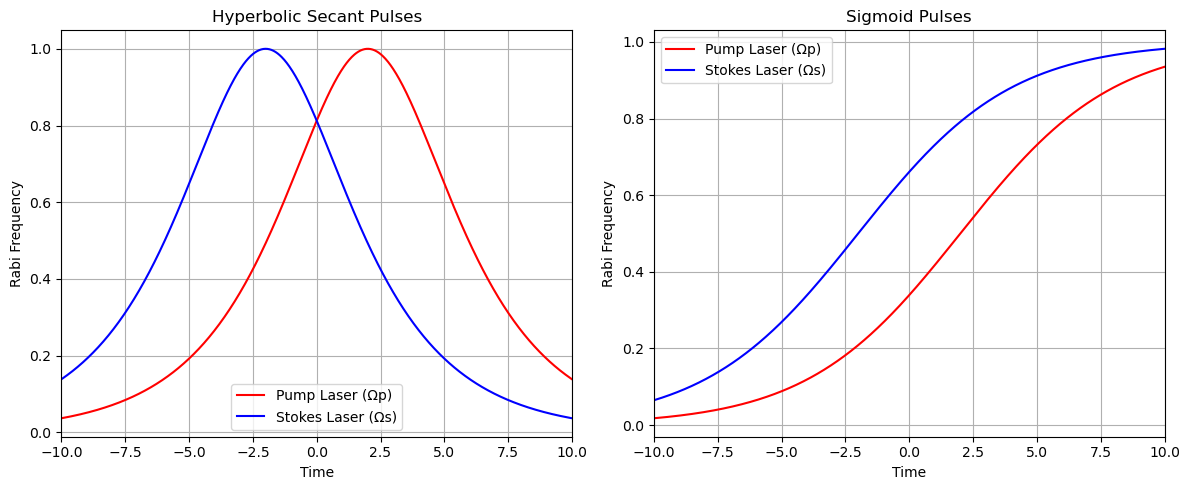

In [25]:
T = 10  
t_values = np.linspace(-T, T, 1000)  


def sech_pulse(t, t0, width, max_amp):
    return max_amp / np.cosh((t - t0) / width)


def sigmoid_pulse(t, t0, width, max_amp):
    return max_amp / (1 + np.exp(-(t - t0) / width))


OmegaP_sech = sech_pulse(t_values, 2, 3, 1)
OmegaS_sech = sech_pulse(t_values, -2, 3, 1)
OmegaP_sigmoid = sigmoid_pulse(t_values, 2, 3, 1)
OmegaS_sigmoid = sigmoid_pulse(t_values, -2, 3, 1)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(t_values, OmegaP_sech, label='Pump Laser (Ωp)', linestyle='-', color='red')
axes[0].plot(t_values, OmegaS_sech, label='Stokes Laser (Ωs)', linestyle='-', color='blue')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Rabi Frequency')
axes[0].set_title('Hyperbolic Secant Pulses')
axes[0].legend()
axes[0].set_xlim((-10,10))
axes[0].grid()


axes[1].plot(t_values, OmegaP_sigmoid, label='Pump Laser (Ωp)', linestyle='-', color='red')
axes[1].plot(t_values, OmegaS_sigmoid, label='Stokes Laser (Ωs)', linestyle='-', color='blue')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Rabi Frequency')
axes[1].set_title('Sigmoid Pulses')
axes[1].legend()
axes[1].set_xlim((-10,10))
axes[1].grid()


plt.tight_layout()


fig.savefig("new_pulses.svg")


plt.show()


In [27]:
Omega0 = 1.0  
alpha = 0.10  
T = 10       
t_values = np.linspace(-T, T, 1000)  

def sech_pulse(t, t0, width, max_amp):
    return max_amp / np.cosh((t - t0) / width)

def sigmoid_pulse(t, t0, width, max_amp):
    return max_amp / (1 + np.exp(-(t - t0) / width))


results = {}

for pulse_function, pulse_name in [(sech_pulse, "Sech"), (sigmoid_pulse, "Sigmoid")]:
    OmegaP_values = pulse_function(t_values, 2, 3, 1)
    OmegaS_values = pulse_function(t_values, -2, 3, 1)
    

    def hamiltonian(t, delta_p=0, delta_s=0):
        OmegaP = pulse_function(t, 2, 3, 1)
        OmegaS = pulse_function(t, -2, 3, 1)
        return np.array([
            [0, OmegaP, 0],
            [OmegaP, -delta_p, OmegaS],
            [0, OmegaS, +delta_s - delta_p]
        ])
    

    def schrodinger(t, psi, delta_p=0, delta_s=0):
        H = hamiltonian(t, delta_p, delta_s)
        return -1j * H @ psi  
    

    psi0 = np.array([1, 0, 0], dtype=complex)
    time_span = (t_values[0], t_values[-1])
    
    sol = solve_ivp(schrodinger, time_span, psi0, t_eval=t_values, method='BDF', args=(0, 0))
    
    final_state = sol.y[:, -1]
    prob_transfer = np.abs(final_state[2])**2
    
    Omega_rms = np.sqrt(OmegaP_values**2 + OmegaS_values**2)
    adiabatic_evaluation = simps(Omega_rms, t_values)
    
    P_LZ = 1 - np.exp(-np.pi * Omega0**2 / (2 * alpha))
    
    results[pulse_name] = (sol, prob_transfer, P_LZ, adiabatic_evaluation)
    
    print(f"{pulse_name} Pulse:")
    print(f"Final transfer probability: {prob_transfer:.6f}")
    print(f"Landau-Zener prediction: {P_LZ:.6f}")
    print(f"Adiabatic integral evaluation: {adiabatic_evaluation:.6f}\n")

Sech Pulse:
Final transfer probability: 0.769826
Landau-Zener prediction: 1.000000
Adiabatic integral evaluation: 13.644127

Sigmoid Pulse:
Final transfer probability: 0.487741
Landau-Zener prediction: 1.000000
Adiabatic integral evaluation: 14.535928



C:\Users\Usuario\AppData\Local\Temp\ipykernel_14208\1398450444.py:44: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  adiabatic_evaluation = simps(Omega_rms, t_values)


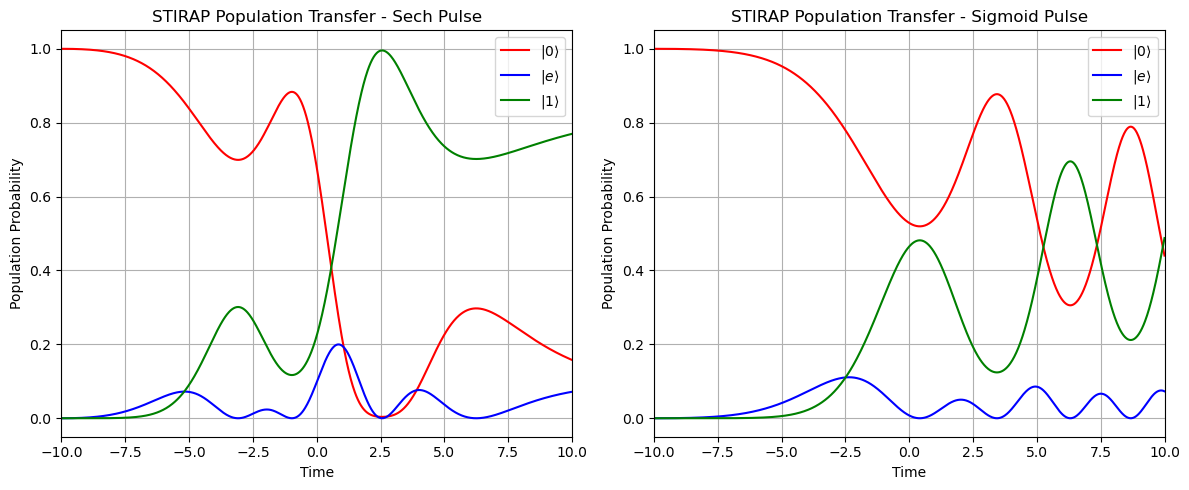

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


for idx, (pulse_name, (sol, _, _, _)) in enumerate(results.items()):
    ax = axes[idx] 


    ax.plot(t_values, np.abs(sol.y[0])**2, label=r'$|0\rangle$', linestyle='-', color='red')  
    ax.plot(t_values, np.abs(sol.y[1])**2, label=r'$|e\rangle$', linestyle='-', color='blue')  
    ax.plot(t_values, np.abs(sol.y[2])**2, label=r'$|1\rangle$', linestyle='-', color='green')  

    ax.set_xlabel('Time')
    ax.set_ylabel('Population Probability')
    ax.set_title(f'STIRAP Population Transfer - {pulse_name} Pulse')
    ax.legend()
    ax.set_xlim((-10, 10))
    ax.grid()

plt.tight_layout()
plt.savefig("Stirap_Comparison.svg", bbox_inches='tight')
plt.show()

In [11]:
pi = np.pi
omega = [0.1, 1, 10, 100]
alpha = 1
results = []
for idx in range(len(omega)):
    prob = 1 -np.exp(-pi*omega[idx]**2/(2*alpha))
    results.append(prob)
print(results)

[0.01558523664828626, 0.7921204236492381, 1.0, 1.0]
